In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import keras

Using TensorFlow backend.


In [4]:
from keras.datasets import fashion_mnist

In [30]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [72]:
y_label_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
                'Ankle Boot']

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Bag


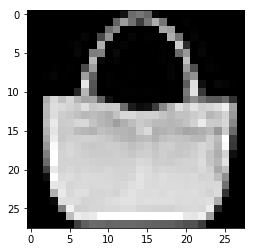

In [99]:
plt.imshow(X_train[100], cmap='gray')
print(y_train[100])

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [35]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [36]:
X_train.shape

(60000, 28, 28, 1)

In [37]:
X_test.shape

(10000, 28, 28, 1)

In [38]:
X_train = X_train.astype('float32')

In [39]:
X_test = X_test.astype('float32')

In [40]:
from keras.utils import to_categorical

In [41]:
y_train = to_categorical(y_train)

In [42]:
y_test = to_categorical(y_test)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [60]:
model = Sequential()
model.add(Conv2D(14, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 14)        140       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 14)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 28)        3556      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               89728     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [63]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [64]:
filepath="/Users/syedshakeeb/Desktop/savedmodels/weights-fashion-mnist.hdf5"

In [65]:
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
checkpointer = [checkpoint]

In [67]:
model_fit = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=50, callbacks=checkpointer)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.7115 - acc: 0.6892 - val_loss: 0.4854 - val_acc: 0.8218

Epoch 00001: loss improved from inf to 2.71146, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-fashion-mnist.hdf5
Epoch 2/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.4568 - acc: 0.8312 - val_loss: 0.4138 - val_acc: 0.8562

Epoch 00002: loss improved from 2.71146 to 0.45681, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-fashion-mnist.hdf5
Epoch 3/10
60000/60000 [==============================] - 125s 2ms/step - loss: 0.4037 - acc: 0.8533 - val_loss: 0.3976 - val_acc: 0.8562

Epoch 00003: loss improved from 0.45681 to 0.40370, saving model to /Users/syedshakeeb/Desktop/savedmodels/weights-fashion-mnist.hdf5
Epoch 4/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.3701 - acc: 0.8614 - val_loss: 0.3874 - val_acc: 0.85

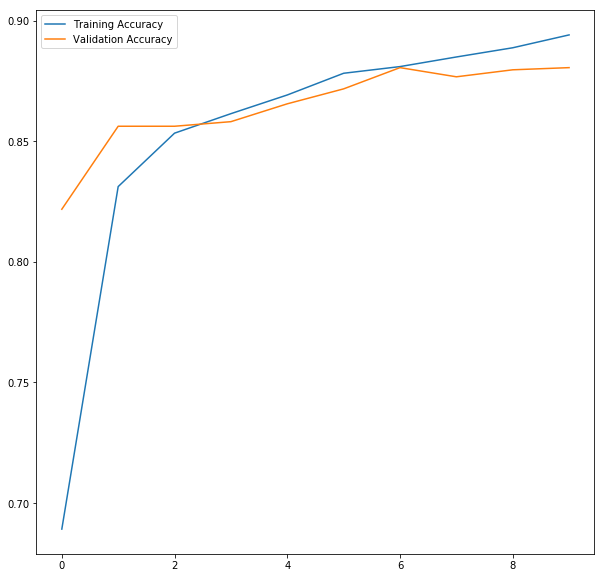

In [93]:
plt.figure(figsize=(10,10))
plt.plot(model_fit.history['acc'])
plt.plot(model_fit.history['val_acc'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

Dress


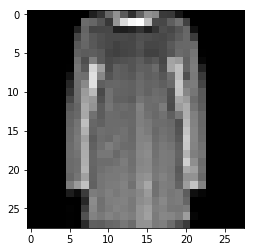

In [86]:
plt.imshow(X_test[150].reshape(28,28), cmap='gray')
print(y_label_list[np.argmax(model.predict(X_test[150].reshape(1,28,28,1)))])

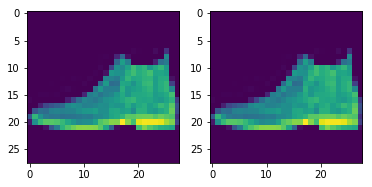

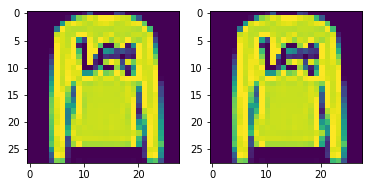

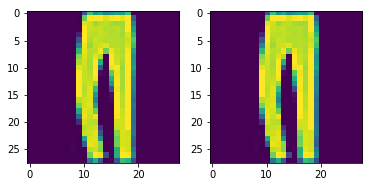

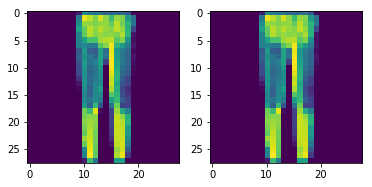

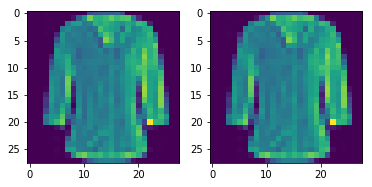

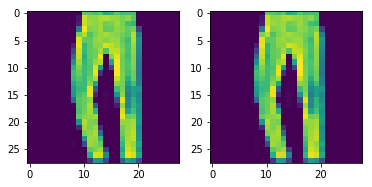

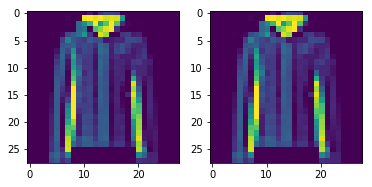

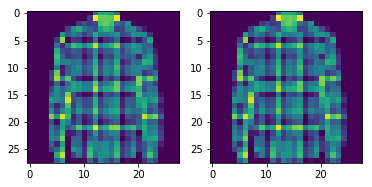

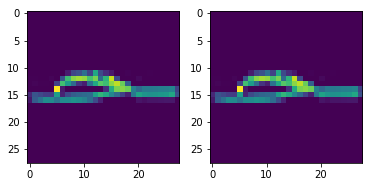

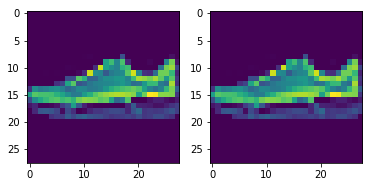

In [159]:
for i in range(10):
    plt.subplot(1,2,1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.subplot(1,2,2)
    plt.imshow(X_test[i].reshape(28,28))
    plt.show()

3
3
4
3
6
6
8
8
0
0
0
0


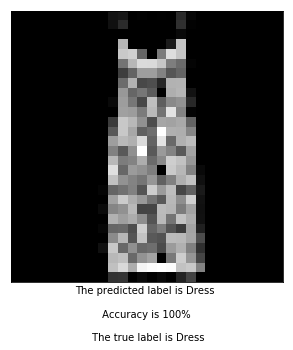

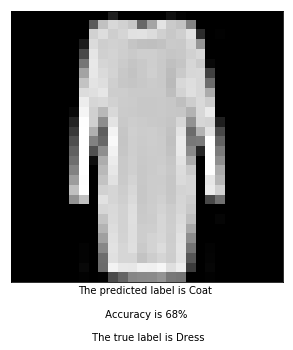

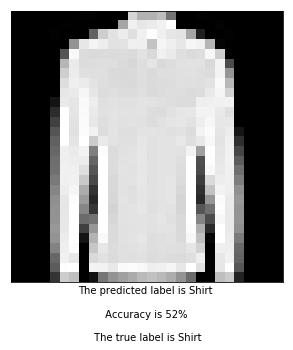

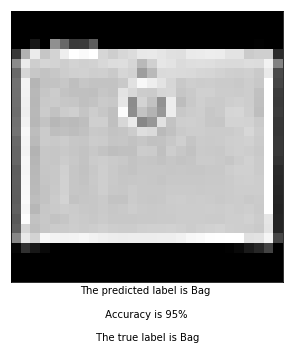

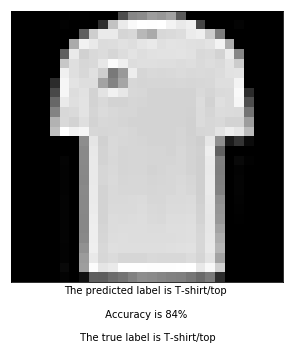

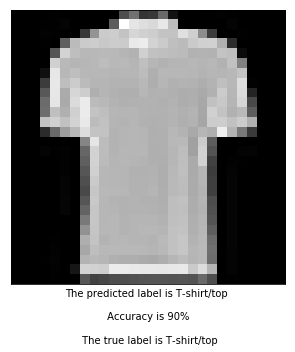

In [189]:
for i in range(300,306):
    
    plt.figure(figsize=(5, 5))
    
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    
    predicted_label = np.argmax(model.predict(X_test[i].reshape(1,28,28,1)))
    
    print(predicted_label)
    print(np.argmax(y_test[i]))
    
    if(predicted_label == np.argmax(y_test[i])):
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("The predicted label is {} \n \n Accuracy is {:2.0f}% \n \n The true label is {}".format(y_label_list[predicted_label], 
                                    100 * np.max(model.predict(X_test[i].reshape(1,28,28,1))), 
                                       y_label_list[np.argmax(y_test[i])],color=color))
    
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()